# Sandpile model simulaition

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
class Sandpile:
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.grid = np.zeros((grid_size, grid_size))
        self.data = []
        self.data_t = []

    def find_high_piles(self):
        x, y = np.where(self.grid >= 4)
        return list(zip(x, y))

    def topple(self):
        unstable = True
        t = 0
        num_affected_squares = 0
        while unstable:
            high_piles_coords = self.find_high_piles()
            t += 1 
            num_affected_squares += len(high_piles_coords)
            for x, y in high_piles_coords:
                self.grid[x, y] -= 4
                if x > 0: self.grid[x-1, y] += 1
                if x < self.grid_size - 1: self.grid[x+1, y] += 1
                if y > 0: self.grid[x, y-1] += 1
                if y < self.grid_size - 1: self.grid[x, y+1] += 1
                        
            if len(self.find_high_piles()) == 0:
                unstable = False
        self.data_t.append(t)
        self.data.append(num_affected_squares)


    def add_sand(self, x, y, grains=1):
        self.grid[x, y] += grains
        self.topple()
            

In [261]:
grid_size = 50
num_grains = 25000
sandpile = Sandpile(grid_size)
coordinates = np.random.randint(0, grid_size, size=(num_grains, 2))
#coordinates = [[grid_size//2, grid_size//2] for a in range(num_grains)]
for coord in tqdm(coordinates):
    sandpile.add_sand(coord[0], coord[1])



100%|██████████| 25000/25000 [00:06<00:00, 3714.61it/s]


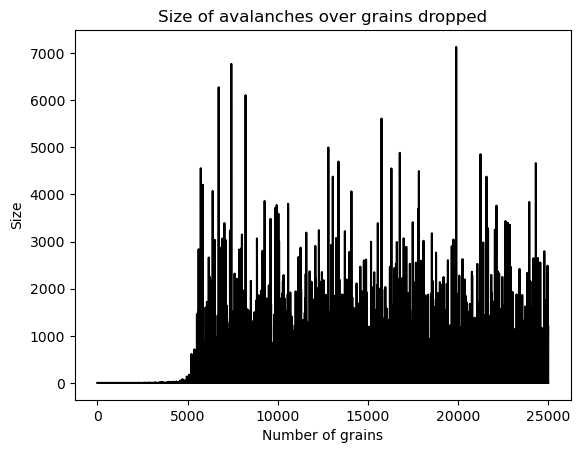

In [266]:
import matplotlib.pyplot as plt

plt.plot(sandpile.data, color = "black")

plt.xlabel('Number of grains')
plt.ylabel('Size')
plt.title('Size of avalanches over grains dropped')
plt.show()
plt.show()


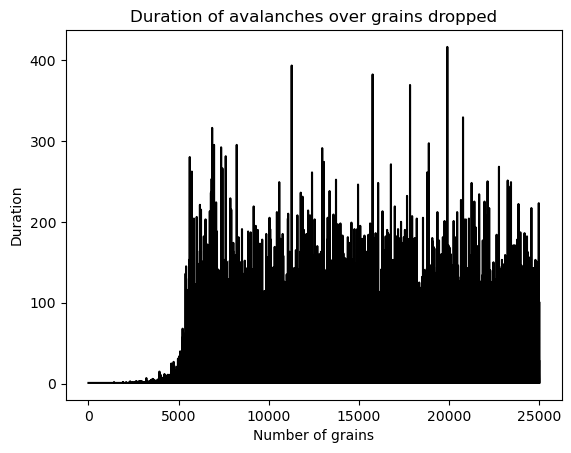

In [268]:
import matplotlib.pyplot as plt

plt.plot(sandpile.data_t, color = "black")

plt.xlabel('Number of grains')
plt.ylabel('Duration')
plt.title('Duration of avalanches over grains dropped')
plt.show()
plt.show()


1257
2
62
12


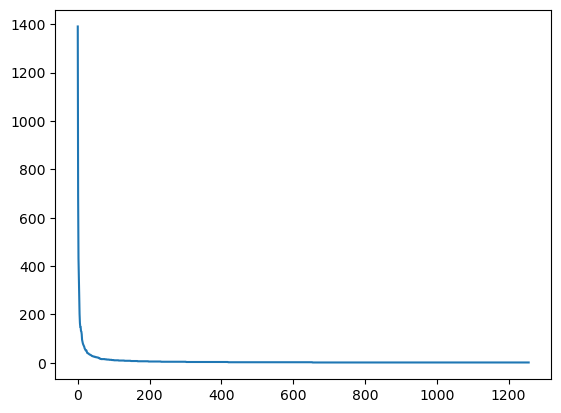

In [305]:
isacco = {}
d = [k for k in sandpile.data if k not in [0]]
for v in d:
    if v not in isacco.keys():
        isacco[v] = 1
    else:
        isacco[v] += 1
plt.plot(sorted(isacco.values(), reverse=True))
print(len(isacco.keys()))
compressed_data = {}
tot_l = len(isacco.keys())
for idx, key in enumerate(isacco.keys()):
    if idx < tot_l//30:
        compressed_data[key] = isacco[key]
    elif idx < tot_l//4 *3:
        v += isacco[key]
        if idx%3 == 10:
            compressed_data[key] = v/3
            v = 0
    elif idx < tot_l:
        v += isacco[key]
        if idx%10  == 0:
            compressed_data[key] = v/11
            v = 0

print(tot_l//500)
print(tot_l//20)
print(tot_l//100)

#print(len(sorted(compressed_data.keys())))

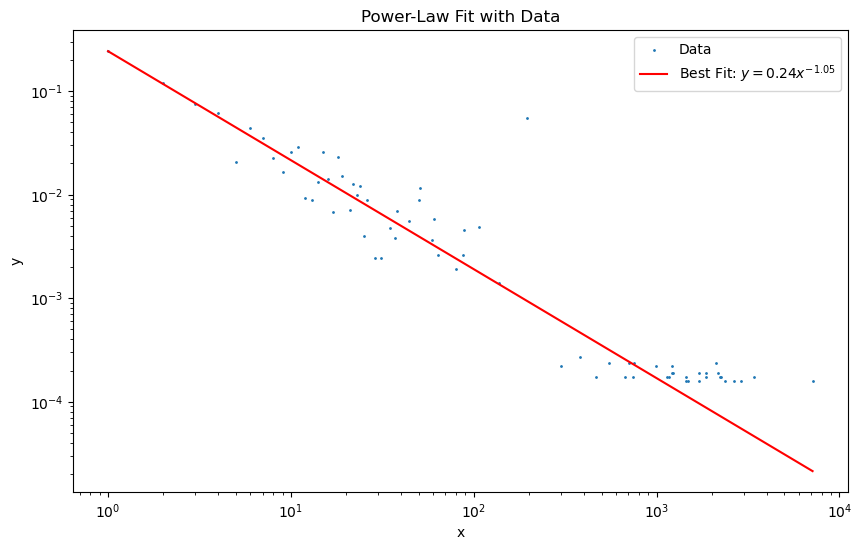

Kolmogorov-Smirnov statistic: 0.2083
p-value: 0.0878
72
[0.00017472 0.00023825 0.0001906  0.00017472 0.00017472 0.00015883
 0.00015883 0.00015883 0.00017472 0.00015883]


In [306]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import kstest

# Define the power-law function
def power_law(x, a, b):
    return a * x**(-b)

x_data = sorted(list((compressed_data.keys())))

y_data = np.array(list(compressed_data.values()))
y_data = y_data / sum(y_data)  # Normalize the data



# Fit the power-law model to the data
popt, _ = curve_fit(power_law, x_data, y_data)

# Extract the optimal parameters
a_opt, b_opt = popt

# Generate fitted curve data
y_fit = power_law(np.array(x_data), a_opt, b_opt)

# Plot the data and the fit on a log-log scale
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, s=1, label='Data')
#plt.plot(y_data, label='Data')

plt.plot(x_data, y_fit, color='red', label=f'Best Fit: $y = {a_opt:.2f}x^{{-{b_opt:.2f}}}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Power-Law Fit with Data')
plt.legend()
plt.show()

# Perform the KS test comparing the normalized data to the power-law distribution
cdf_empirical = np.cumsum(y_data) / np.sum(y_data)
cdf_theoretical = np.cumsum((np.array(x_data) ** (-b_opt)) / np.sum(np.array(x_data) ** (-b_opt)))

ks_statistic, p_value = kstest(cdf_empirical, cdf_theoretical)

# Print the results
print(f"Kolmogorov-Smirnov statistic: {ks_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

print(len(x_data))
print(y_data[-10:])